# Import Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import statsmodels.api as sm
##import mplcursors
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

# Load the Dataset

In [2]:
df = pd.read_csv('COVIDdemographic.csv')
df.head()

,State,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,...,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Total population_HISPANIC OR LATINO
0,Alabama,387786,14345,4887871,2369271,2518600,288589,290369,321430,332209,...,493396,251025,85242,4887871,3306838,1307040,22063,65095,1797,4887871
1,Alaska,18316,367,737438,382952,354486,52173,52544,49747,48514,...,59630,21000,7370,737438,474555,25197,111371,46381,7958,737438
2,Arizona,426614,18857,7171646,3565129,3606517,434032,441613,488738,477306,...,727956,398408,132739,7171646,5590505,336340,330599,237873,15661,7171646
3,Arkansas,161569,3301,3013825,1476680,1537145,188092,192523,203502,208021,...,296808,154699,56169,3013825,2306096,456714,20951,47548,9398,3013825
4,California,2664110,102387,39557045,19673553,19883492,2428493,2398894,2646096,2557470,...,3286461,1651296,729580,39557045,23535388,2283850,302792,5821585,155739,39557045


# Shape of a dataframe

In [3]:
df.shape

(51, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   State                                       51 non-null     object
 1   cases                                       51 non-null     int64 
 2   deaths                                      51 non-null     int64 
 3   Total Population                            51 non-null     int64 
 4   Total population_Male                       51 non-null     int64 
 5   Total population_Female                     51 non-null     int64 
 6   Under 5 years                               51 non-null     int64 
 7   5 to 9 years                                51 non-null     int64 
 8   10 to 14 years                              51 non-null     int64 
 9   15 to 19 years                              51 non-null     int64 
 10  20 to 24 years              

In [5]:
df.isnull().sum()

State                                         0
cases                                         0
deaths                                        0
Total Population                              0
Total population_Male                         0
Total population_Female                       0
Under 5 years                                 0
5 to 9 years                                  0
10 to 14 years                                0
15 to 19 years                                0
20 to 24 years                                0
25 to 34 years                                0
35 to 44 years                                0
45 to 54 years                                0
55 to 59 years                                0
60 to 64 years                                0
65 to 74 years                                0
75 to 84 years                                0
85 years and over                             0
RACE_Total population                         0
White                                   

In [6]:
df.describe()

,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,...,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Total population_HISPANIC OR LATINO
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,...,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,51.000000,5.100000e+01
mean,1.056306e+06,5.861198e+04,6.415048e+06,3.159179e+06,3.255868e+06,3.852219e+05,3.883510e+05,4.194691e+05,4.204999e+05,4.258424e+05,...,5.994375e+05,3.048618e+05,123604.862745,6.415048e+06,4.630844e+06,8.160346e+05,54933.078431,3.610823e+05,12275.568627,6.415048e+06
std,2.249183e+06,1.579360e+05,7.343308e+06,3.628720e+06,3.715146e+06,4.565007e+05,4.501072e+05,4.942501e+05,4.817187e+05,4.934780e+05,...,6.423737e+05,3.359567e+05,142146.703257,7.343308e+06,4.872214e+06,9.833194e+05,76477.000582,8.507498e+05,29651.663554,7.343308e+06
min,1.831600e+04,2.810000e+02,5.777370e+05,2.926190e+05,2.851180e+05,2.881000e+04,3.201900e+04,3.338600e+04,3.756800e+04,3.288000e+04,...,4.883300e+04,2.100000e+04,7370.000000,5.777370e+05,2.967470e+05,3.667000e+03,1743.000000,5.807000e+03,51.000000,5.777370e+05
25%,1.696980e+05,4.021000e+03,1.780020e+06,8.884075e+05,8.916125e+05,1.038075e+05,1.105810e+05,1.186685e+05,1.198940e+05,1.148050e+05,...,1.706250e+05,8.526700e+04,37668.000000,1.780020e+06,1.588392e+06,6.971400e+04,13736.500000,3.754350e+04,1211.000000,1.780020e+06
50%,3.877860e+05,1.425100e+04,4.468402e+06,2.199021e+06,2.269381e+06,2.734890e+05,2.799780e+05,2.858330e+05,2.889440e+05,3.007440e+05,...,4.354650e+05,2.118690e+05,81382.000000,4.468402e+06,3.305047e+06,3.547610e+05,25657.000000,1.190460e+05,3859.000000,4.468402e+06
75%,1.047118e+06,5.046050e+04,7.353618e+06,3.665994e+06,3.687624e+06,4.461130e+05,4.540500e+05,4.784465e+05,4.682640e+05,4.913170e+05,...,7.193685e+05,3.616560e+05,137769.500000,7.353618e+06,5.611884e+06,1.365175e+06,57508.000000,3.524065e+05,8678.000000,7.353618e+06
max,1.504181e+07,1.081194e+06,3.955704e+07,1.967355e+07,1.988349e+07,2.428493e+06,2.398894e+06,2.646096e+06,2.557470e+06,2.710448e+06,...,3.286461e+06,1.651296e+06,729580.000000,3.955704e+07,2.353539e+07,3.527027e+06,330599.000000,5.821585e+06,155739.000000,3.955704e+07


In [7]:
corr = df.corr()
corr

,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,...,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Total population_HISPANIC OR LATINO
cases,1.000000,0.990033,0.474197,0.467591,0.480579,0.445039,0.432210,0.427069,0.449039,0.466246,...,0.490507,0.500801,0.536630,0.474197,0.449186,0.512076,0.072430,0.399092,0.045184,0.474197
deaths,0.990033,1.000000,0.381703,0.374954,0.388237,0.352253,0.338495,0.332640,0.355787,0.374678,...,0.401017,0.412830,0.449968,0.381703,0.357395,0.437061,0.044793,0.321336,0.002666,0.381703
Total Population,0.474197,0.381703,1.000000,0.999922,0.999926,0.994301,0.994205,0.994159,0.996431,0.997935,...,0.987113,0.972106,0.964929,1.000000,0.987836,0.790134,0.446071,0.846644,0.469451,1.000000
Total population_Male,0.467591,0.374954,0.999922,1.000000,0.999696,0.994986,0.994910,0.994888,0.996746,0.998295,...,0.985777,0.970211,0.963131,0.999922,0.987550,0.784252,0.450225,0.849893,0.474392,0.999922
Total population_Female,0.480579,0.388237,0.999926,0.999696,1.000000,0.993483,0.993368,0.993297,0.995975,0.997434,...,0.988270,0.973811,0.966540,0.999926,0.987967,0.795760,0.441946,0.843344,0.464553,0.999926
Under 5 years,0.445039,0.352253,0.994301,0.994986,0.993483,1.000000,0.999627,0.999392,0.998417,0.996974,...,0.966701,0.945656,0.934517,0.994301,0.982582,0.776991,0.459525,0.843027,0.473724,0.994301
5 to 9 years,0.432210,0.338495,0.994205,0.994910,0.993368,0.999627,1.000000,0.999727,0.998928,0.996929,...,0.967036,0.945379,0.932996,0.994205,0.983305,0.780179,0.459685,0.839254,0.471881,0.994205
10 to 14 years,0.427069,0.332640,0.994159,0.994888,0.993297,0.999392,0.999727,1.000000,0.998906,0.996780,...,0.967042,0.945864,0.933797,0.994159,0.982653,0.778248,0.462720,0.841328,0.472402,0.994159
15 to 19 years,0.449039,0.355787,0.996431,0.996746,0.995975,0.998417,0.998928,0.998906,1.000000,0.998400,...,0.973195,0.953029,0.941984,0.996431,0.985960,0.790820,0.450504,0.836441,0.459347,0.996431
20 to 24 years,0.466246,0.374678,0.997935,0.998295,0.997434,0.996974,0.996929,0.996780,0.998400,1.000000,...,0.976225,0.957059,0.950304,0.997935,0.982956,0.775786,0.457376,0.858616,0.480216,0.997935


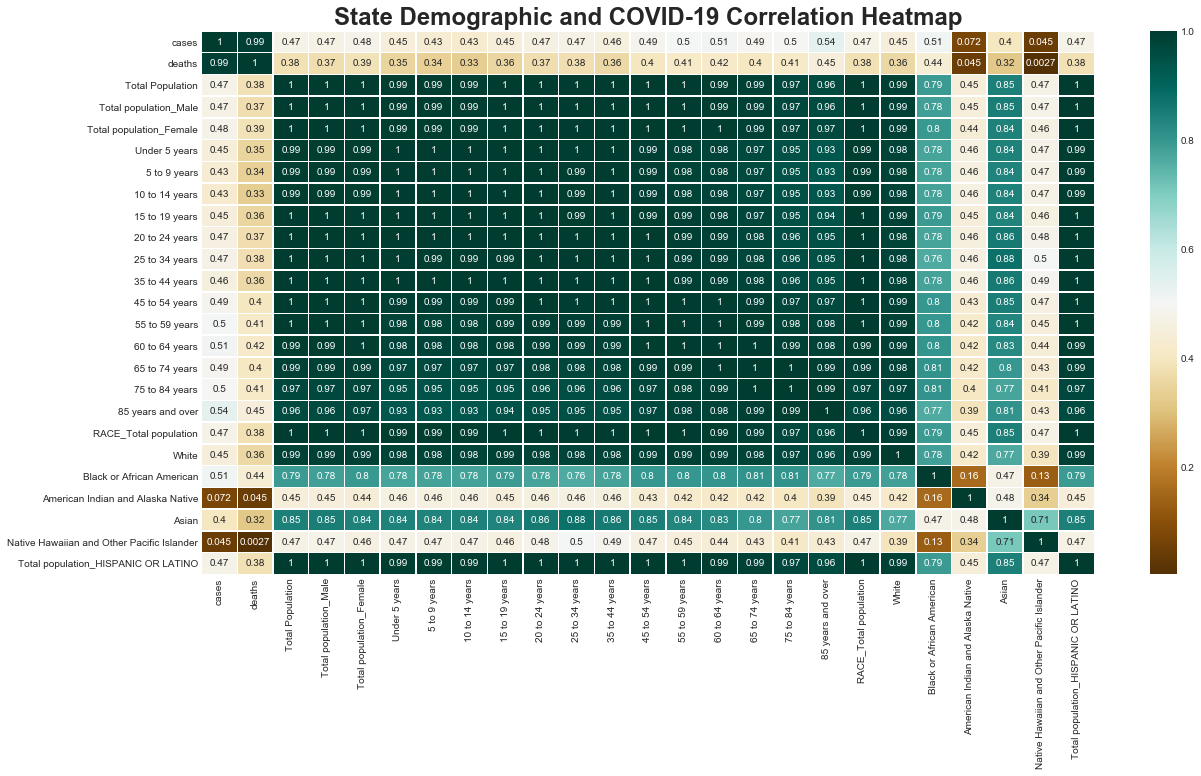

In [8]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Demographic and COVID-19 Correlation Heatmap', fontweight = 'bold', fontsize = 24);

# Histogram

# Age

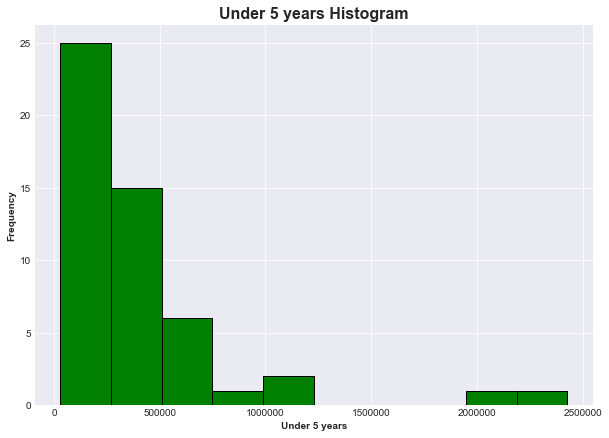

In [9]:
plt.style.use('seaborn-darkgrid')

df['Under 5 years'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('Under 5 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Under 5 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

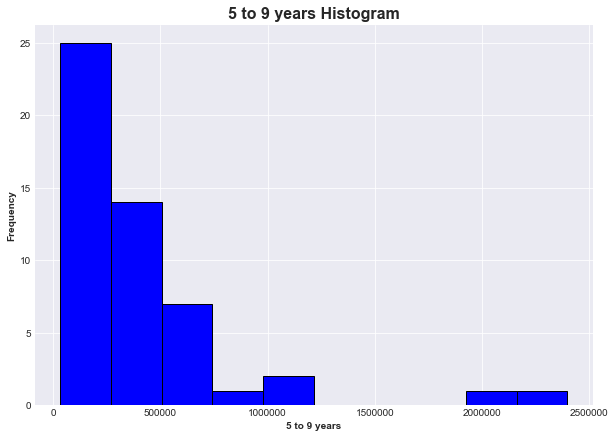

In [10]:
plt.style.use('seaborn-darkgrid')

df['5 to 9 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('5 to 9 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('5 to 9 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

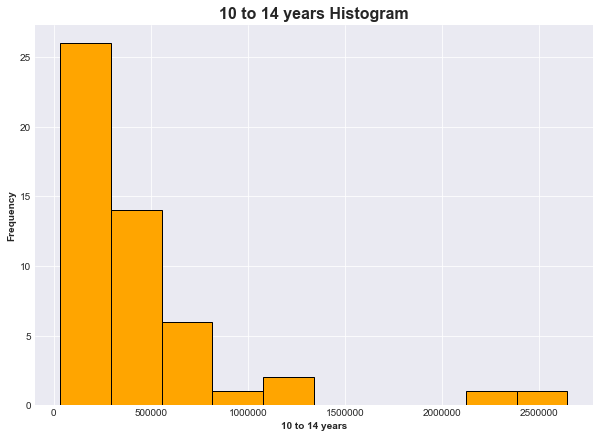

In [11]:
plt.style.use('seaborn-darkgrid')

df['10 to 14 years'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('10 to 14 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('10 to 14 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

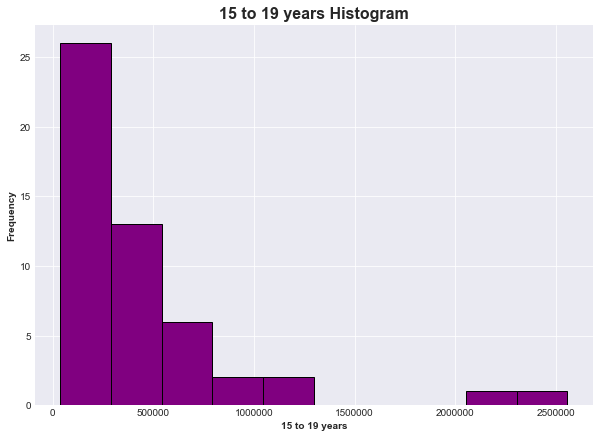

In [12]:
plt.style.use('seaborn-darkgrid')

df['15 to 19 years'].plot(kind = 'hist', color = 'purple', edgecolor = 'black', figsize = (10,7))
plt.title('15 to 19 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('15 to 19 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

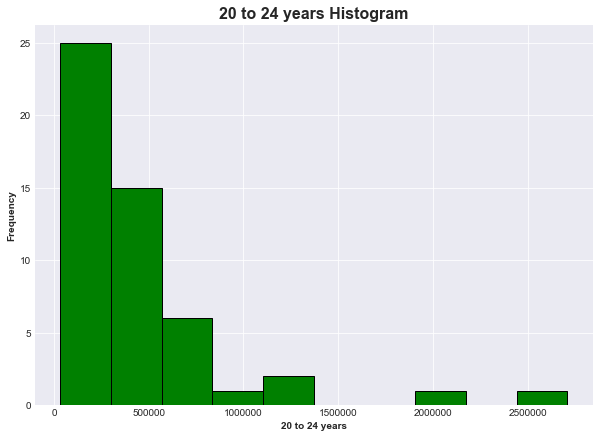

In [13]:
plt.style.use('seaborn-darkgrid')

df['20 to 24 years'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('20 to 24 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('20 to 24 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

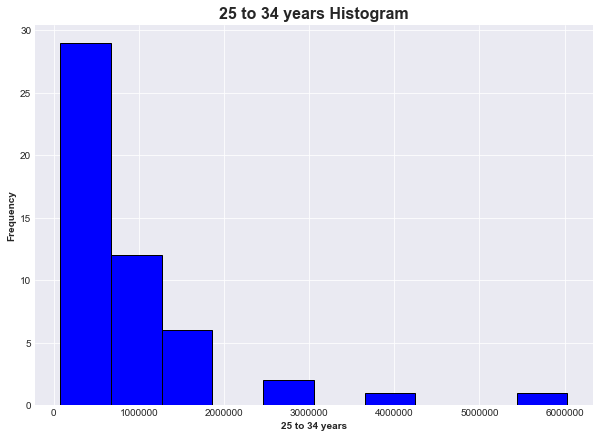

In [14]:
plt.style.use('seaborn-darkgrid')

df['25 to 34 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('25 to 34 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('25 to 34 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

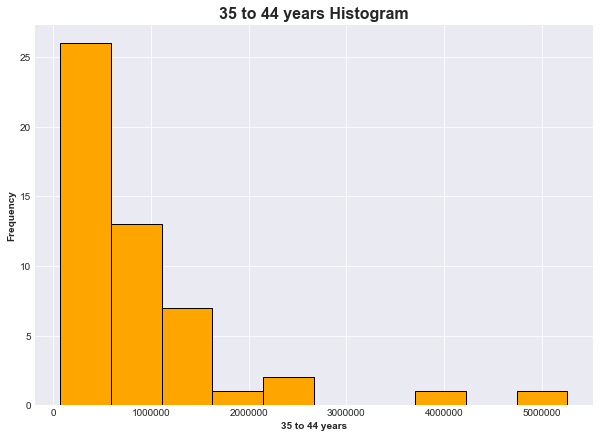

In [15]:
plt.style.use('seaborn-darkgrid')

df['35 to 44 years'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('35 to 44 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('35 to 44 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

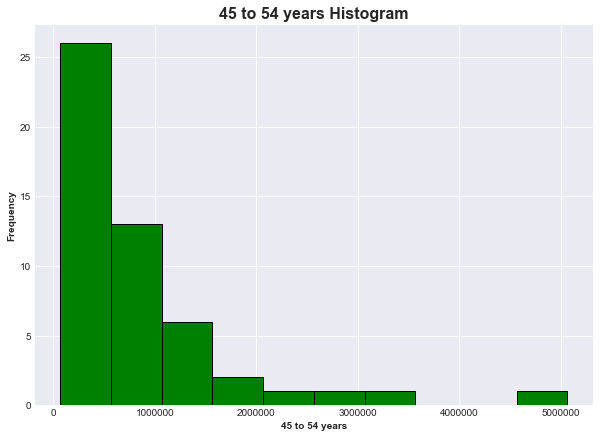

In [16]:
plt.style.use('seaborn-darkgrid')

df['45 to 54 years'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('45 to 54 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('45 to 54 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

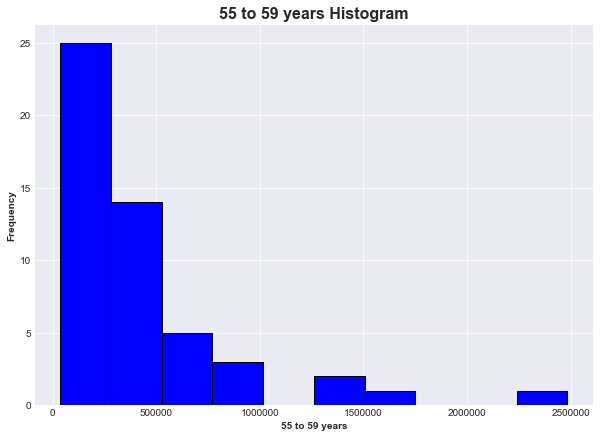

In [17]:
plt.style.use('seaborn-darkgrid')

df['55 to 59 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('55 to 59 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('55 to 59 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

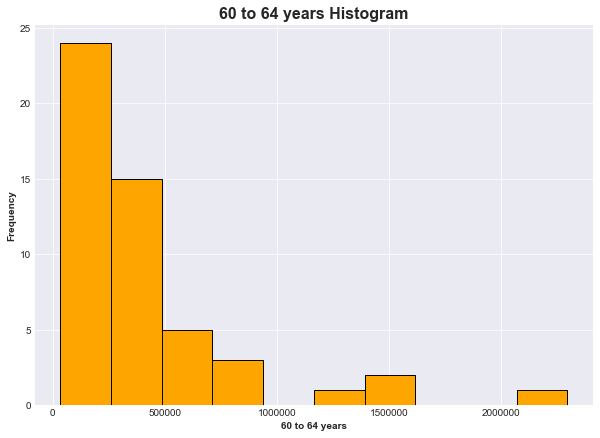

In [18]:
plt.style.use('seaborn-darkgrid')

df['60 to 64 years'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('60 to 64 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('60 to 64 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

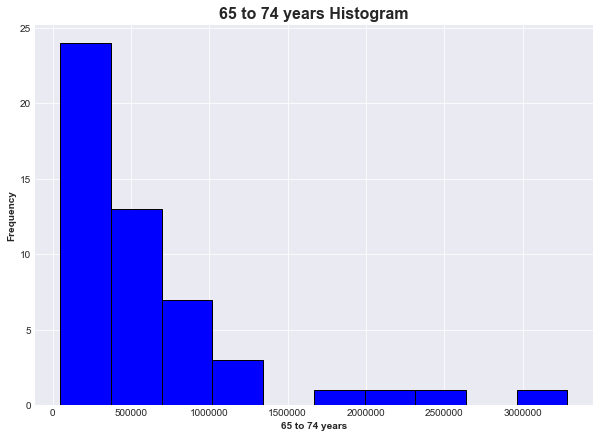

In [19]:
plt.style.use('seaborn-darkgrid')

df['65 to 74 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('65 to 74 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('65 to 74 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

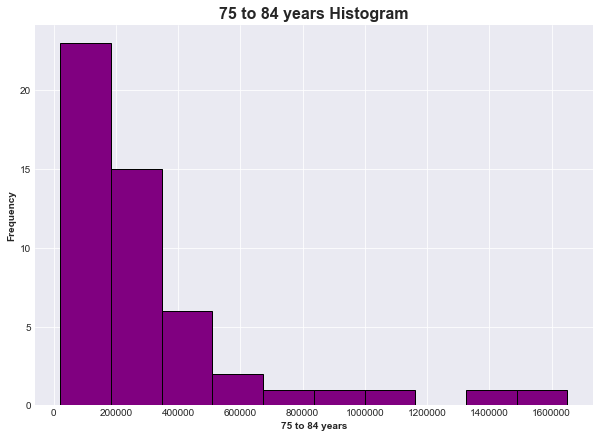

In [20]:
plt.style.use('seaborn-darkgrid')

df['75 to 84 years'].plot(kind = 'hist', color = 'purple', edgecolor = 'black', figsize = (10,7))
plt.title('75 to 84 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('75 to 84 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

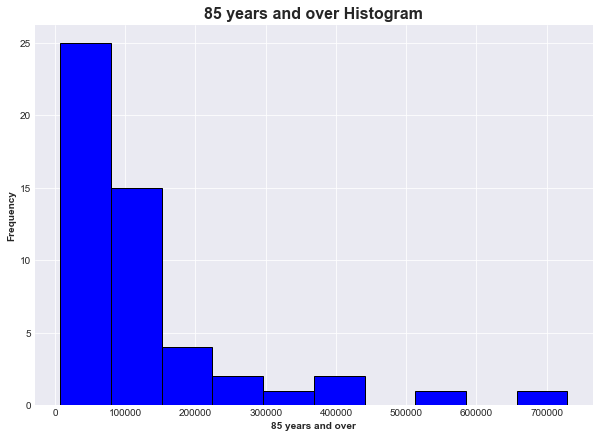

In [21]:
plt.style.use('seaborn-darkgrid')

df['85 years and over'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('85 years and over Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('85 years and over', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

# Violin Plot

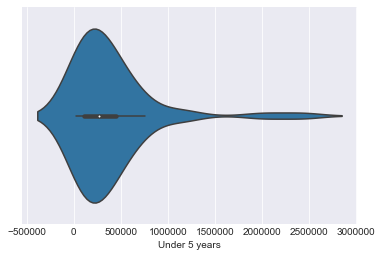

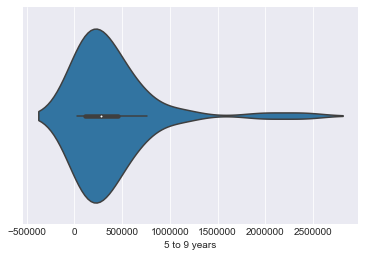

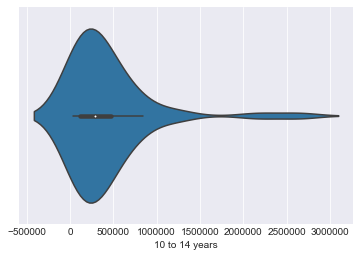

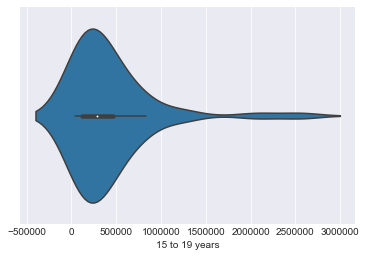

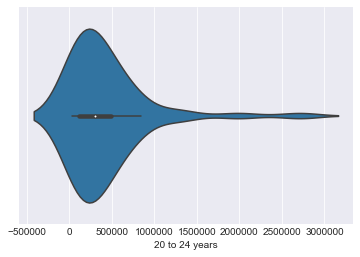

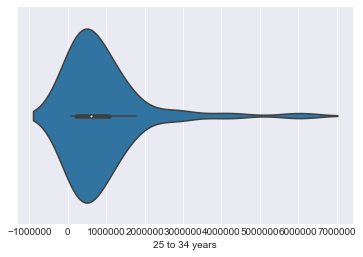

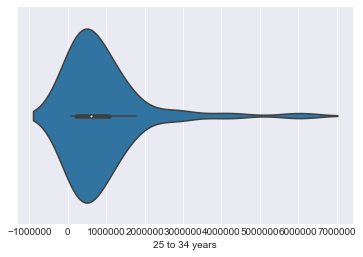

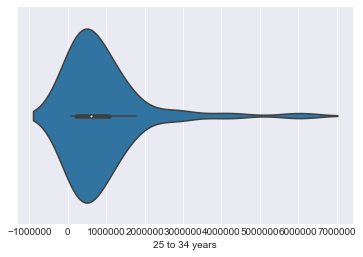

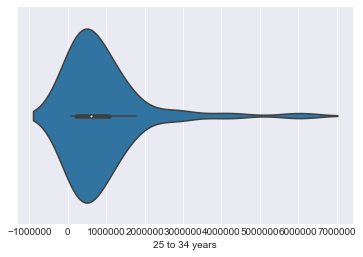

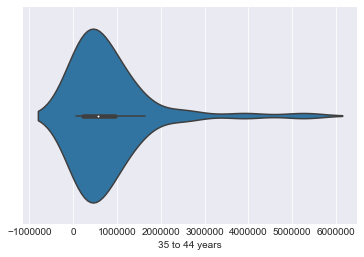

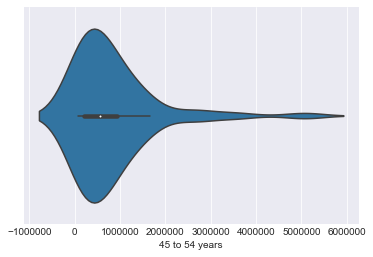

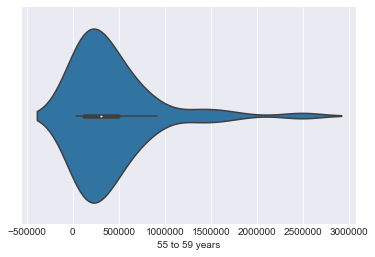

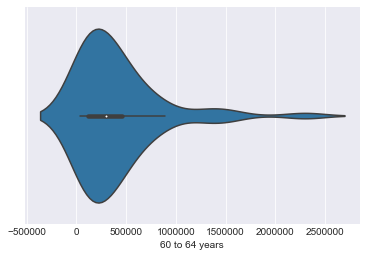

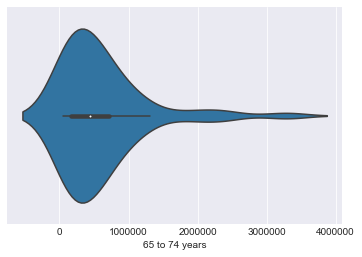

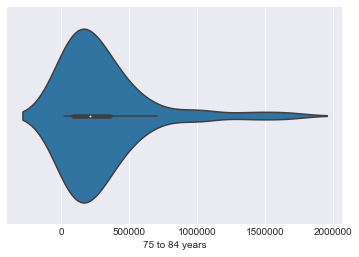

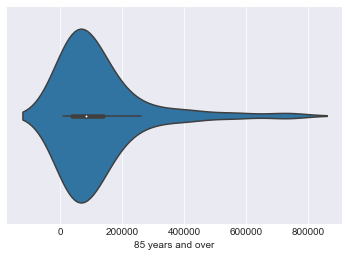

In [22]:
# Violin plot of Under 5 years
sns.violinplot(x='Under 5 years', data=df)
plt.show()

# Violin plot of 5 to 9 years
sns.violinplot(x='5 to 9 years', data=df)
plt.show()

# Violin plot of 10 to 14 years
sns.violinplot(x='10 to 14 years', data=df)
plt.show()

# Violin plot of 15 to 19 years
sns.violinplot(x='15 to 19 years', data=df)
plt.show()

# Violin plot of 20 to 24 years
sns.violinplot(x='20 to 24 years', data=df)
plt.show()

# Violin plot of 25 to 34 years
sns.violinplot(x='25 to 34 years', data=df)
plt.show()

# Violin plot of 25 to 34 years
sns.violinplot(x='25 to 34 years', data=df)
plt.show()


# Violin plot of 25 to 34 years
sns.violinplot(x='25 to 34 years', data=df)
plt.show()

# Violin plot of 25 to 34 years
sns.violinplot(x='25 to 34 years', data=df)
plt.show()


# Violin plot of 35 to 44 years
sns.violinplot(x='35 to 44 years', data=df)
plt.show()


# Violin plot of 45 to 54 years
sns.violinplot(x='45 to 54 years', data=df)
plt.show()

# Violin plot of 55 to 59 years
sns.violinplot(x='55 to 59 years', data=df)
plt.show()

# Violin plot of 60 to 64 years
sns.violinplot(x='60 to 64 years', data=df)
plt.show()

# Violin plot of 65 to 74 years
sns.violinplot(x='65 to 74 years', data=df)
plt.show()

# Violin plot of 75 to 84 years
sns.violinplot(x='75 to 84 years', data=df)
plt.show()

# Violin plot of 85 years and over
sns.violinplot(x='85 years and over', data=df)
plt.show()



# AGE VS COVID-19 Case Count

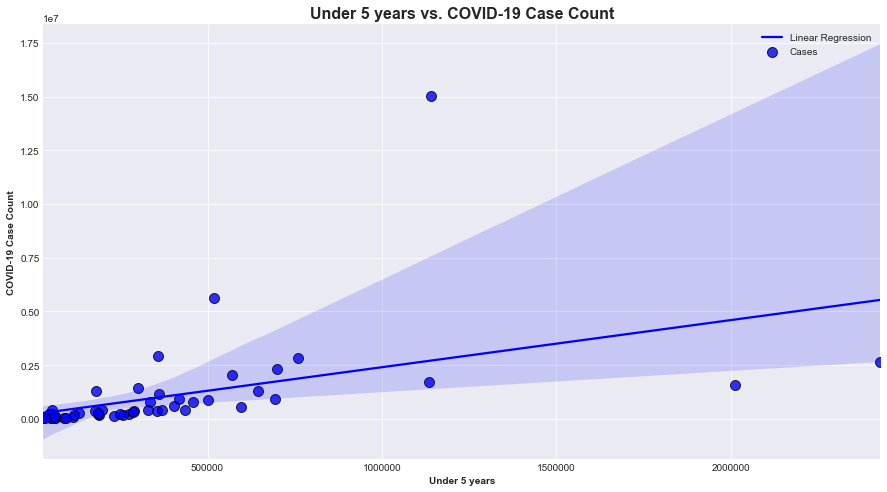

In [23]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Under 5 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Under 5 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Under 5 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# AGE - Ordinary Least Square Regression(OLS)

In [24]:
model1 = sm.OLS(df['cases'], df['Under 5 years']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.341
Model:                            OLS   Adj. R-squared (uncentered):              0.328
Method:                 Least Squares   F-statistic:                              25.88
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    5.49e-06
Time:                        03:04:26   Log-Likelihood:                         -812.33
No. Observations:                  51   AIC:                                      1627.
Df Residuals:                      50   BIC:                                      1629.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Under 5 years     2.4239      0.476      5.087      0.000       1.467       3.381
==============================================================================
Omnibus:                       83.920   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1461.323
Skew:                           4.429   Prob(JB):                         0.00
Kurtosis:                      27.682   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

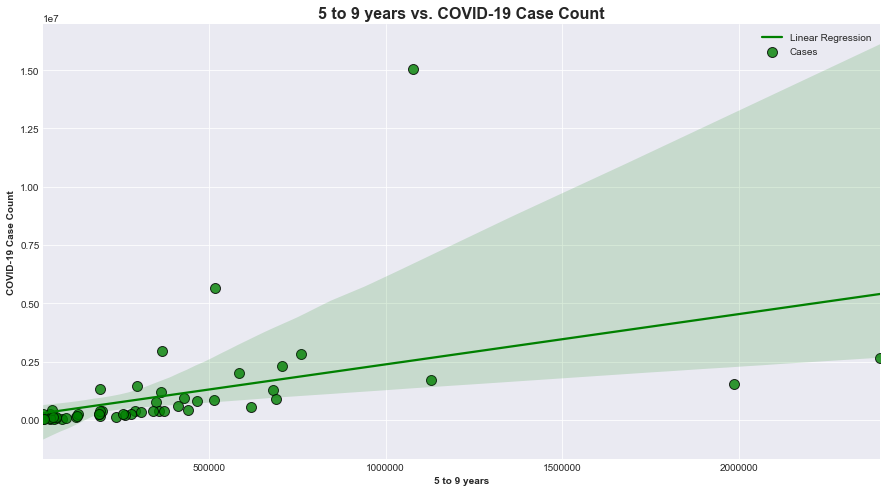

In [25]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '5 to 9 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('5 to 9 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('5 to 9 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [26]:
model2 = sm.OLS(df['cases'], df['5 to 9 years']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.332
Model:                            OLS   Adj. R-squared (uncentered):              0.318
Method:                 Least Squares   F-statistic:                              24.82
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    7.91e-06
Time:                        03:04:26   Log-Likelihood:                         -812.69
No. Observations:                  51   AIC:                                      1627.
Df Residuals:                      50   BIC:                                      1629.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
5 to 9 years     2.4015      0.482      4.982      0.000       1.433       3.370
==============================================================================
Omnibus:                       85.404   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1543.559
Skew:                           4.540   Prob(JB):                         0.00
Kurtosis:                      28.376   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

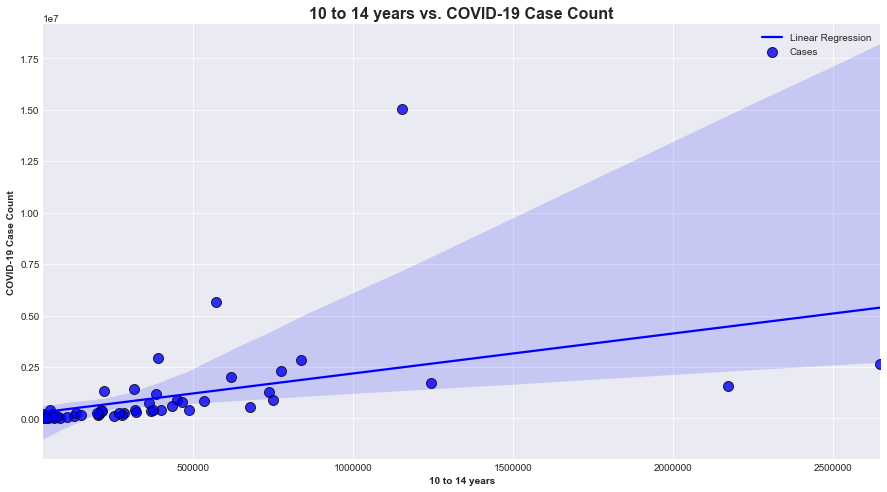

In [27]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '10 to 14 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('10 to 14 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('10 to 14 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [28]:
model3 = sm.OLS(df['cases'], df['10 to 14 years']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.327
Model:                            OLS   Adj. R-squared (uncentered):              0.314
Method:                 Least Squares   F-statistic:                              24.30
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    9.49e-06
Time:                        03:04:27   Log-Likelihood:                         -812.87
No. Observations:                  51   AIC:                                      1628.
Df Residuals:                      50   BIC:                                      1630.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
10 to 14 years     2.1869      0.444      4.929      0.000       1.296       3.078
==============================================================================
Omnibus:                       85.544   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1556.002
Skew:                           4.548   Prob(JB):                         0.00
Kurtosis:                      28.485   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

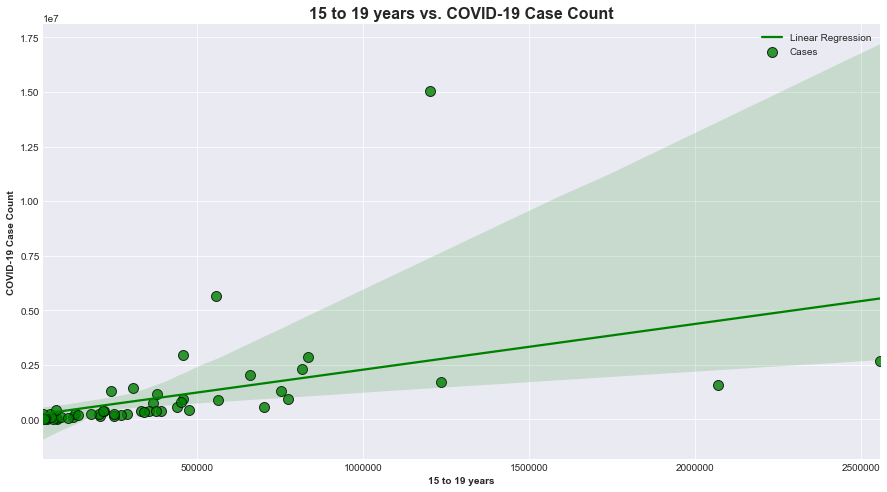

In [29]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '15 to 19 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('15 to 19 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('15 to 19 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [30]:
model4 = sm.OLS(df['cases'], df['15 to 19 years']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.345
Model:                            OLS   Adj. R-squared (uncentered):              0.332
Method:                 Least Squares   F-statistic:                              26.39
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    4.63e-06
Time:                        03:04:27   Log-Likelihood:                         -812.16
No. Observations:                  51   AIC:                                      1626.
Df Residuals:                      50   BIC:                                      1628.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
15 to 19 years     2.2783      0.444      5.137      0.000       1.387       3.169
==============================================================================
Omnibus:                       85.345   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1541.654
Skew:                           4.535   Prob(JB):                         0.00
Kurtosis:                      28.362   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

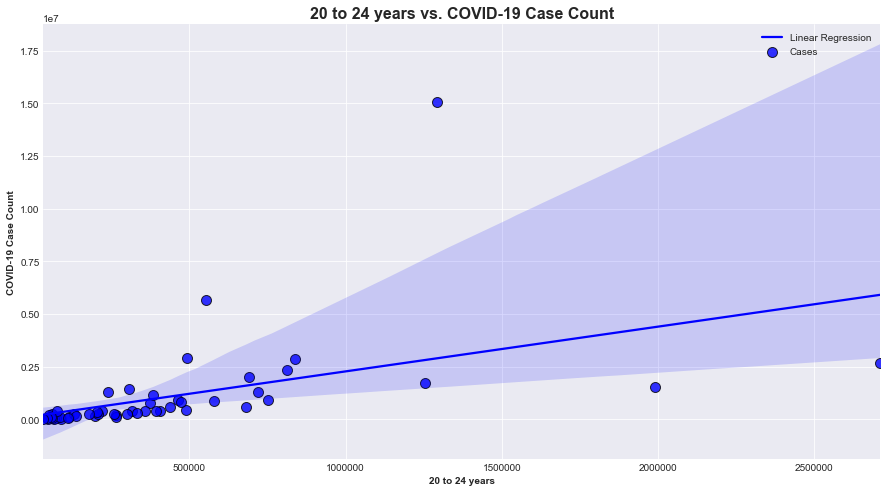

In [31]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '20 to 24 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('20 to 24 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('20 to 24 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [32]:
model5 = sm.OLS(df['cases'], df['20 to 24 years']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.359
Model:                            OLS   Adj. R-squared (uncentered):              0.346
Method:                 Least Squares   F-statistic:                              28.00
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    2.70e-06
Time:                        03:04:28   Log-Likelihood:                         -811.63
No. Observations:                  51   AIC:                                      1625.
Df Residuals:                      50   BIC:                                      1627.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
20 to 24 years     2.2785      0.431      5.291      0.000       1.414       3.143
==============================================================================
Omnibus:                       84.076   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1471.192
Skew:                           4.440   Prob(JB):                         0.00
Kurtosis:                      27.768   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

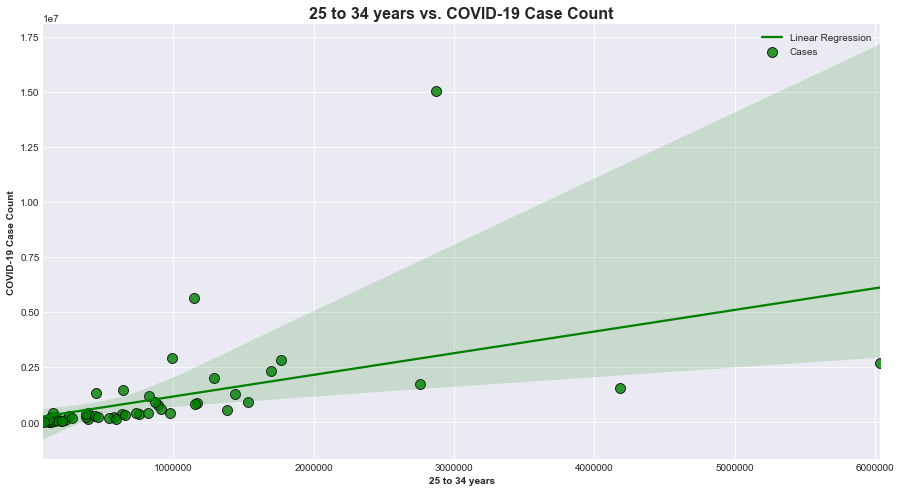

In [33]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '25 to 34 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('25 to 34 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('25 to 34 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [34]:
model6 = sm.OLS(df['cases'], df['25 to 34 years']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.362
Model:                            OLS   Adj. R-squared (uncentered):              0.349
Method:                 Least Squares   F-statistic:                              28.37
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    2.38e-06
Time:                        03:04:28   Log-Likelihood:                         -811.50
No. Observations:                  51   AIC:                                      1625.
Df Residuals:                      50   BIC:                                      1627.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
25 to 34 years     1.0671      0.200      5.327      0.000       0.665       1.470
==============================================================================
Omnibus:                       82.215   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.593
Skew:                           4.302   Prob(JB):                    3.24e-299
Kurtosis:                      26.934   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

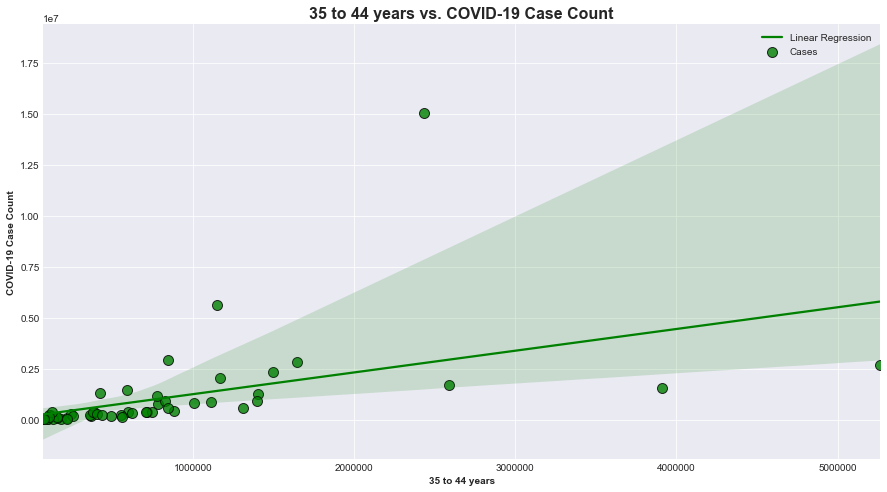

In [35]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '35 to 44 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('35 to 44 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('35 to 44 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [36]:
model7 = sm.OLS(df['cases'], df['35 to 44 years']).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.350
Model:                            OLS   Adj. R-squared (uncentered):              0.337
Method:                 Least Squares   F-statistic:                              26.94
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    3.84e-06
Time:                        03:04:29   Log-Likelihood:                         -811.98
No. Observations:                  51   AIC:                                      1626.
Df Residuals:                      50   BIC:                                      1628.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
35 to 44 years     1.1629      0.224      5.190      0.000       0.713       1.613
==============================================================================
Omnibus:                       84.227   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1483.886
Skew:                           4.449   Prob(JB):                         0.00
Kurtosis:                      27.882   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

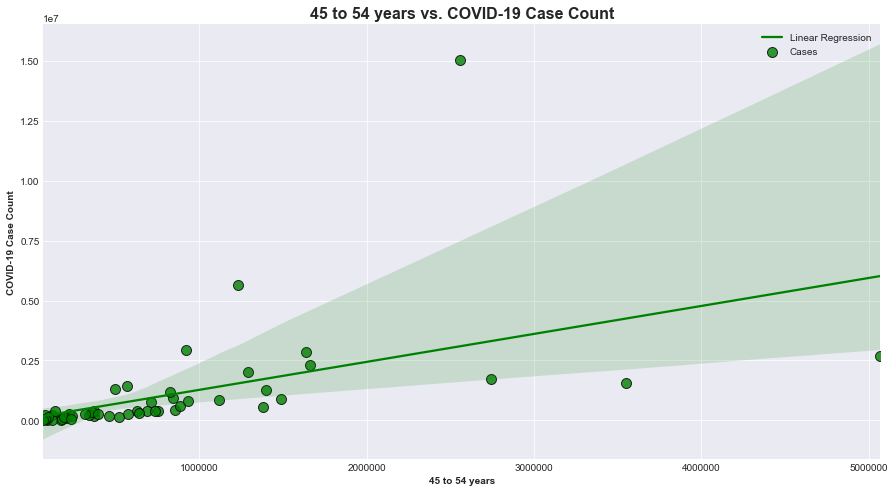

In [37]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '45 to 54 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('45 to 54 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('45 to 54 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [38]:
model8 = sm.OLS(df['cases'], df['45 to 54 years']).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.378
Model:                            OLS   Adj. R-squared (uncentered):              0.365
Method:                 Least Squares   F-statistic:                              30.37
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    1.25e-06
Time:                        03:04:29   Log-Likelihood:                         -810.86
No. Observations:                  51   AIC:                                      1624.
Df Residuals:                      50   BIC:                                      1626.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
45 to 54 years     1.2227      0.222      5.511      0.000       0.777       1.668
==============================================================================
Omnibus:                       84.162   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1485.348
Skew:                           4.441   Prob(JB):                         0.00
Kurtosis:                      27.902   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

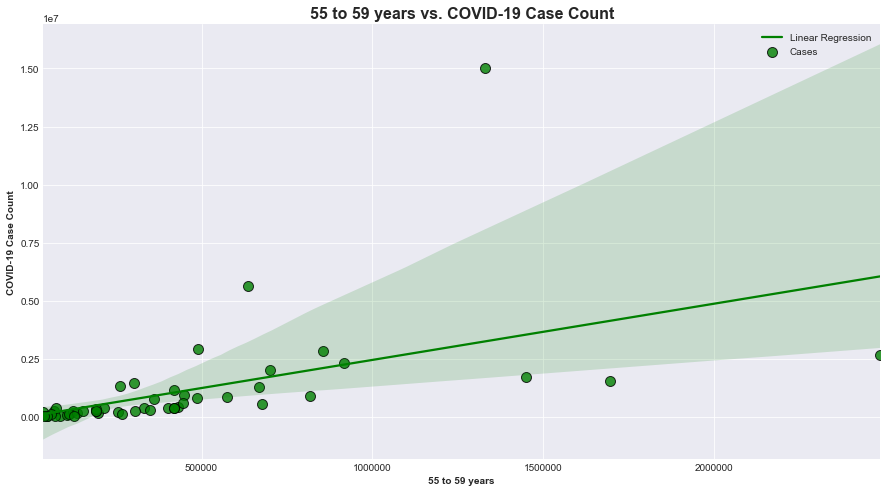

In [39]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '55 to 59 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('55 to 59 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('55 to 59 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [40]:
model9 = sm.OLS(df['cases'], df['55 to 59 years']).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.391
Model:                            OLS   Adj. R-squared (uncentered):              0.379
Method:                 Least Squares   F-statistic:                              32.10
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    7.21e-07
Time:                        03:04:30   Log-Likelihood:                         -810.32
No. Observations:                  51   AIC:                                      1623.
Df Residuals:                      50   BIC:                                      1625.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
55 to 59 years     2.4537      0.433      5.665      0.000       1.584       3.324
==============================================================================
Omnibus:                       84.882   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1518.167
Skew:                           4.499   Prob(JB):                         0.00
Kurtosis:                      28.169   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

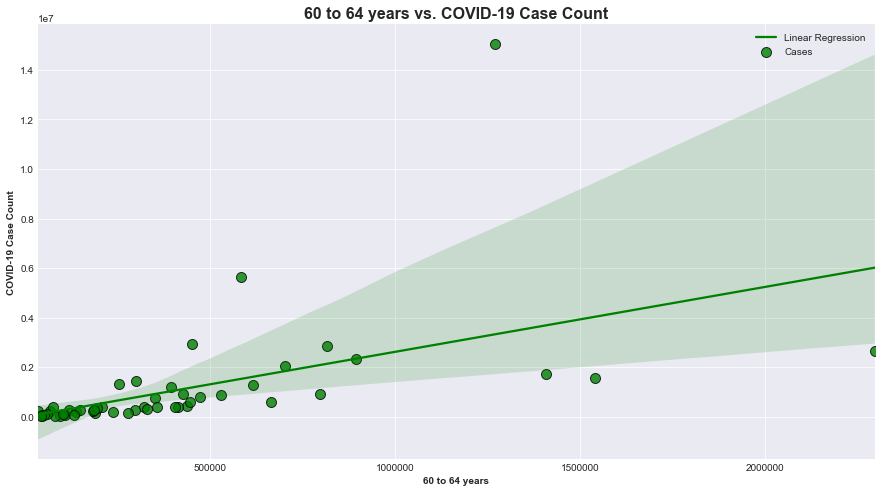

In [41]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '60 to 64 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('60 to 64 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('60 to 64 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [42]:
model10 = sm.OLS(df['cases'], df['60 to 64 years']).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.395
Model:                            OLS   Adj. R-squared (uncentered):              0.383
Method:                 Least Squares   F-statistic:                              32.66
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    6.06e-07
Time:                        03:04:30   Log-Likelihood:                         -810.15
No. Observations:                  51   AIC:                                      1622.
Df Residuals:                      50   BIC:                                      1624.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
60 to 64 years     2.6146      0.458      5.715      0.000       1.696       3.534
==============================================================================
Omnibus:                       85.103   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1519.471
Skew:                           4.521   Prob(JB):                         0.00
Kurtosis:                      28.165   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

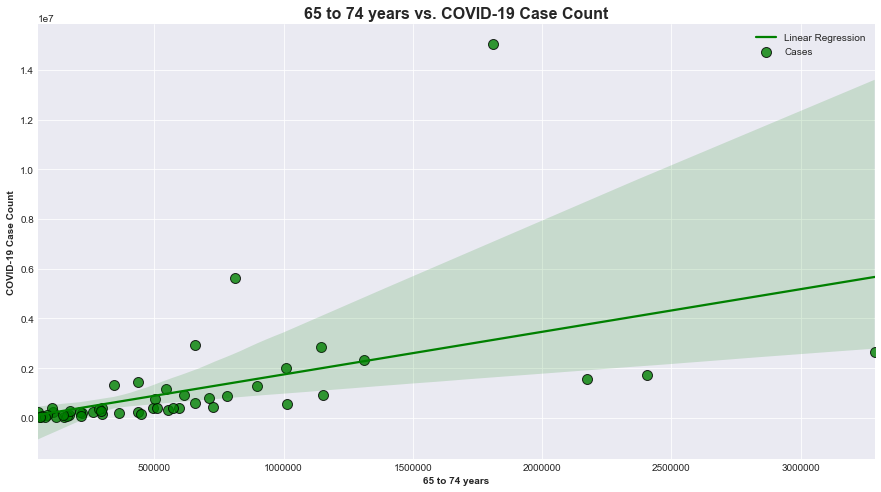

In [43]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '65 to 74 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('65 to 74 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('65 to 74 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [44]:
model11 = sm.OLS(df['cases'], df['65 to 74 years']).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.380
Model:                            OLS   Adj. R-squared (uncentered):              0.368
Method:                 Least Squares   F-statistic:                              30.65
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    1.14e-06
Time:                        03:04:31   Log-Likelihood:                         -810.78
No. Observations:                  51   AIC:                                      1624.
Df Residuals:                      50   BIC:                                      1625.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
65 to 74 years     1.7385      0.314      5.536      0.000       1.108       2.369
==============================================================================
Omnibus:                       85.416   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1523.609
Skew:                           4.552   Prob(JB):                         0.00
Kurtosis:                      28.182   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

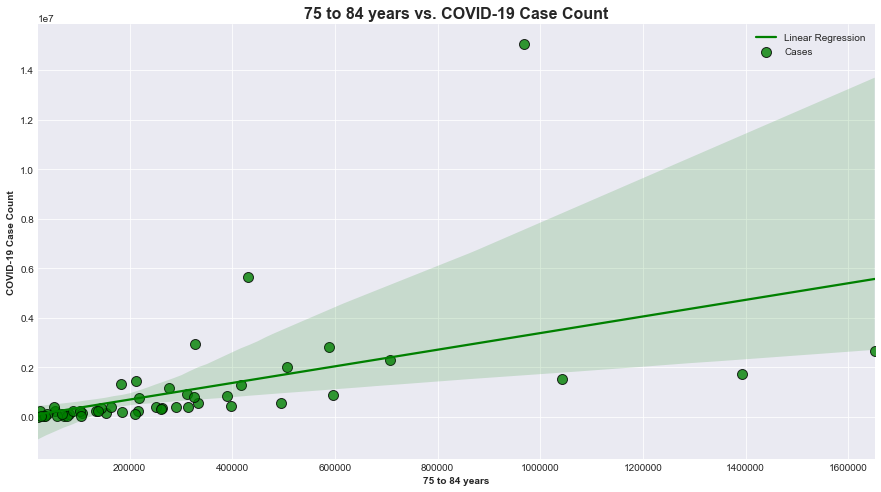

In [45]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '75 to 84 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('75 to 84 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('75 to 84 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [46]:
model12 = sm.OLS(df['cases'], df['75 to 84 years']).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.388
Model:                            OLS   Adj. R-squared (uncentered):              0.376
Method:                 Least Squares   F-statistic:                              31.74
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    8.07e-07
Time:                        03:04:31   Log-Likelihood:                         -810.43
No. Observations:                  51   AIC:                                      1623.
Df Residuals:                      50   BIC:                                      1625.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
75 to 84 years     3.4040      0.604      5.634      0.000       2.190       4.618
==============================================================================
Omnibus:                       84.035   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1451.454
Skew:                           4.446   Prob(JB):                         0.00
Kurtosis:                      27.576   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

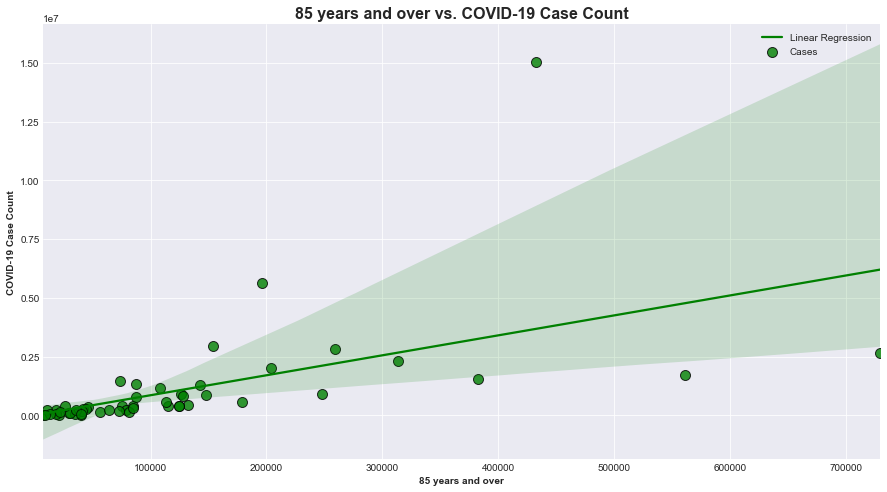

In [47]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '85 years and over', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('85 years and over vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('85 years and over', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [48]:
model13 = sm.OLS(df['cases'], df['85 years and over']).fit()
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.419
Model:                            OLS   Adj. R-squared (uncentered):              0.407
Method:                 Least Squares   F-statistic:                              36.02
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    2.18e-07
Time:                        03:04:32   Log-Likelihood:                         -809.13
No. Observations:                  51   AIC:                                      1620.
Df Residuals:                      50   BIC:                                      1622.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
85 years and over     8.5149      1.419      6.002      0.000       5.665      11.365
==============================================================================
Omnibus:                       82.005   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1373.892
Skew:                           4.281   Prob(JB):                    4.60e-299
Kurtosis:                      26.942   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ALL AGES - Ordinary Least Square Regression(OLS)

In [49]:
model14 = sm.OLS(df['cases'], df[['Under 5 years', '5 to 9 years', '10 to 14 years',
                                       '15 to 19 years', '20 to 24 years',
                                       '25 to 34 years','35 to 44 years','45 to 54 years',
                                 '55 to 59 years','60 to 64 years','65 to 74 years',
                                 '75 to 84 years','85 years and over']]).fit()
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.829
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                              14.19
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    8.75e-11
Time:                        03:04:32   Log-Likelihood:                         -777.91
No. Observations:                  51   AIC:                                      1582.
Df Residuals:                      38   BIC:                                      1607.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Under 5 years        95.5715     24.432      3.912      0.000      46.111     145.032
5 to 9 years        -75.0656     38.139     -1.968      0.056    -152.275       2.143
10 to 14 years      -76.2965     21.870     -3.489      0.001    -120.570     -32.023
15 to 19 years       36.0862     19.835      1.819      0.077      -4.068      76.240
20 to 24 years        6.1029     15.864      0.385      0.703     -26.012      38.218
25 to 34 years      -11.9589      7.058     -1.694      0.098     -26.247       2.329
35 to 44 years       19.8627     12.927      1.537      0.133      -6.306      46.032
45 to 54 years        3.0750     10.394      0.296      0.769     -17.967      24.117
55 to 59 years      -10.9091     24.369     -0.448      0.657     -60.242      38.424
60 to 64 years       35.6323     22.559      1.580      0.123     -10.036      81.301
65 to 74 years      -21.7088     18.462     -1.176      0.247     -59.083      15.665
75 to 84 years       15.2165     26.405      0.576      0.568     -38.237      68.670
85 years and over   -15.9386     30.346     -0.525      0.602     -77.370      45.493
==============================================================================
Omnibus:                        5.084   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                4.284
Skew:                           0.465   Prob(JB):                        0.117
Kurtosis:                       4.073   Cond. No.                         892.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# AGE VS COVID-19 Case Per State

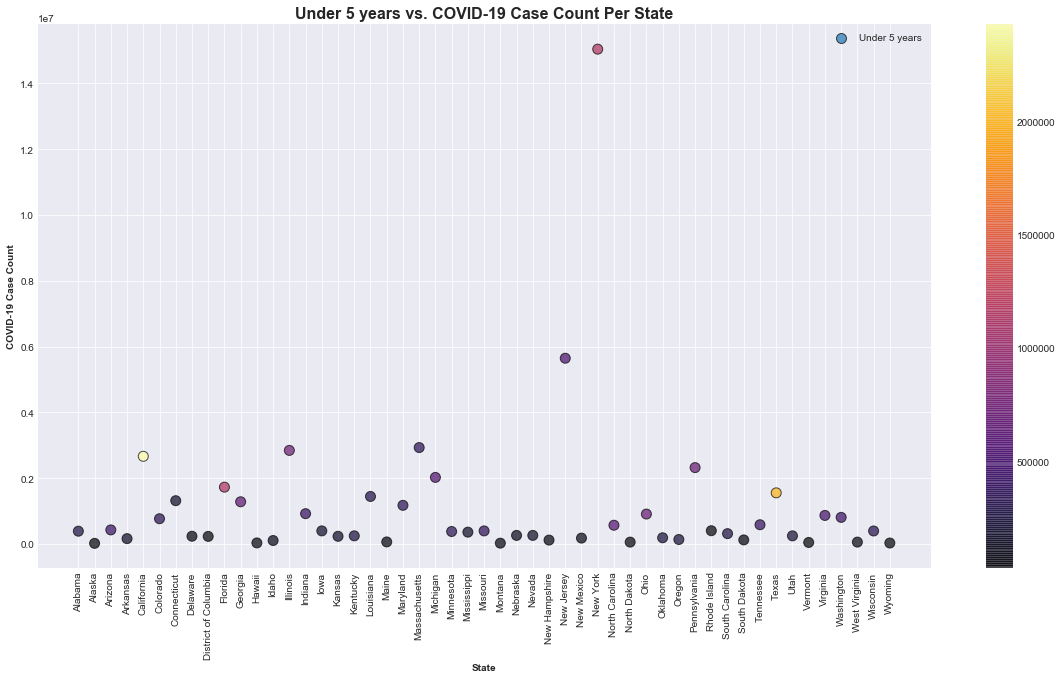

In [50]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Under 5 years'], cmap = 'inferno')
plt.title('Under 5 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Under 5 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

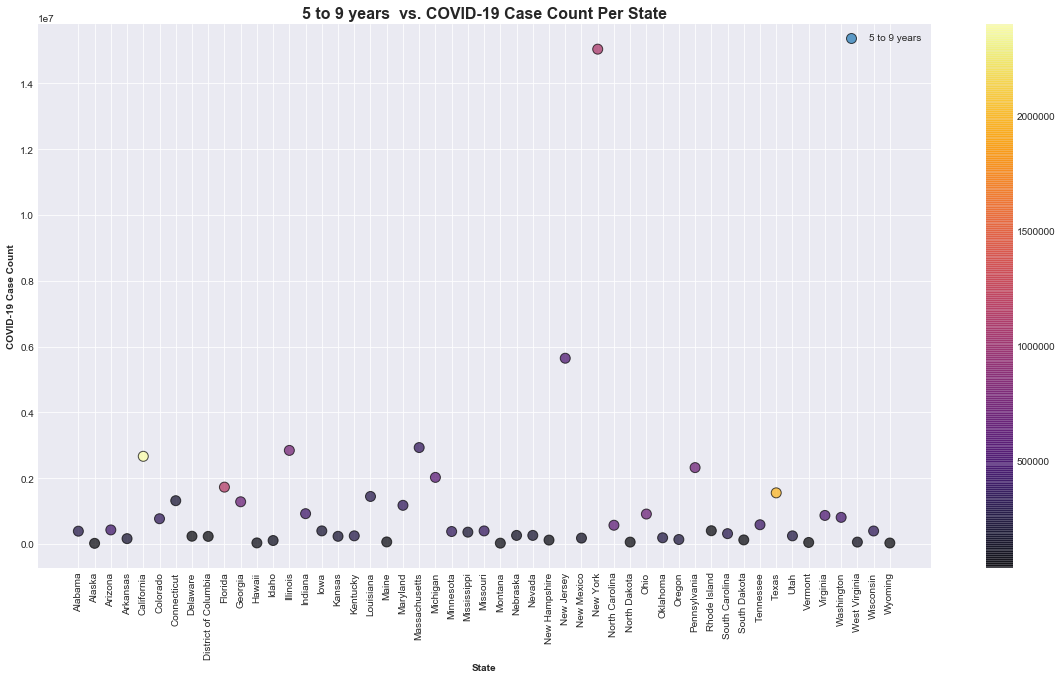

In [51]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['5 to 9 years'], cmap = 'inferno')
plt.title('5 to 9 years  vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['5 to 9 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

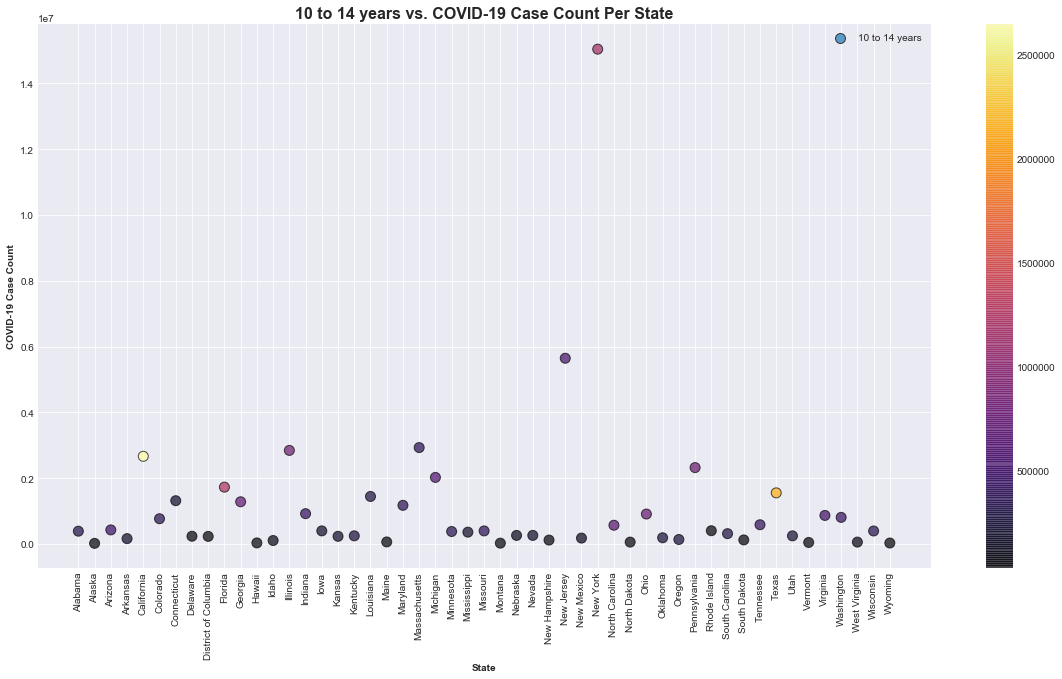

In [52]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['10 to 14 years'], cmap = 'inferno')
plt.title('10 to 14 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['10 to 14 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

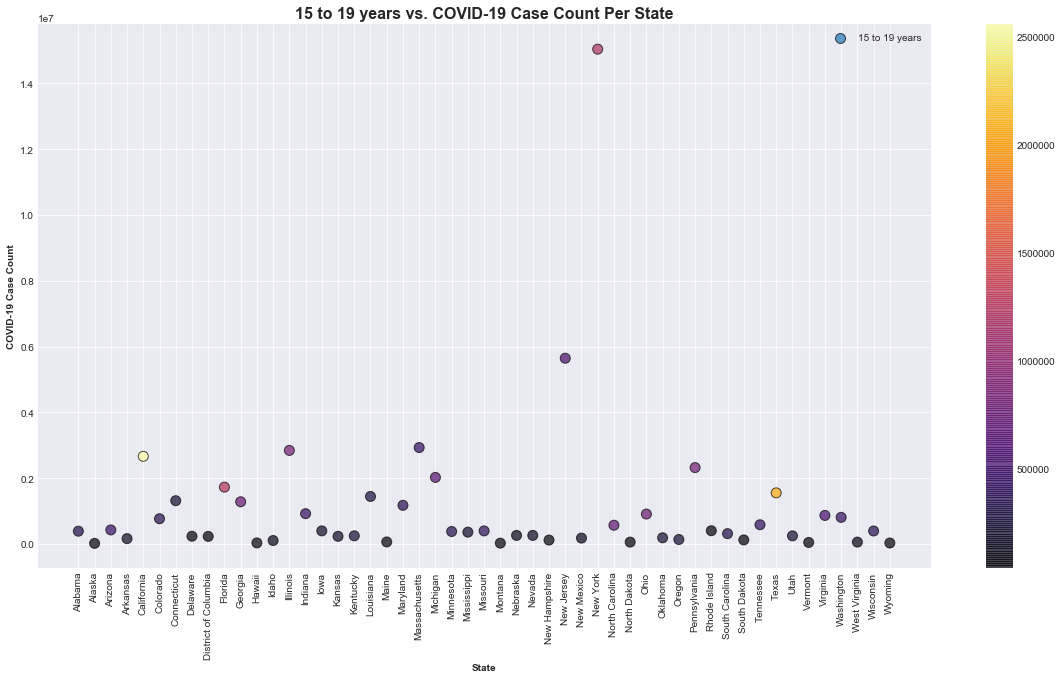

In [53]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['15 to 19 years'], cmap = 'inferno')
plt.title('15 to 19 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['15 to 19 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

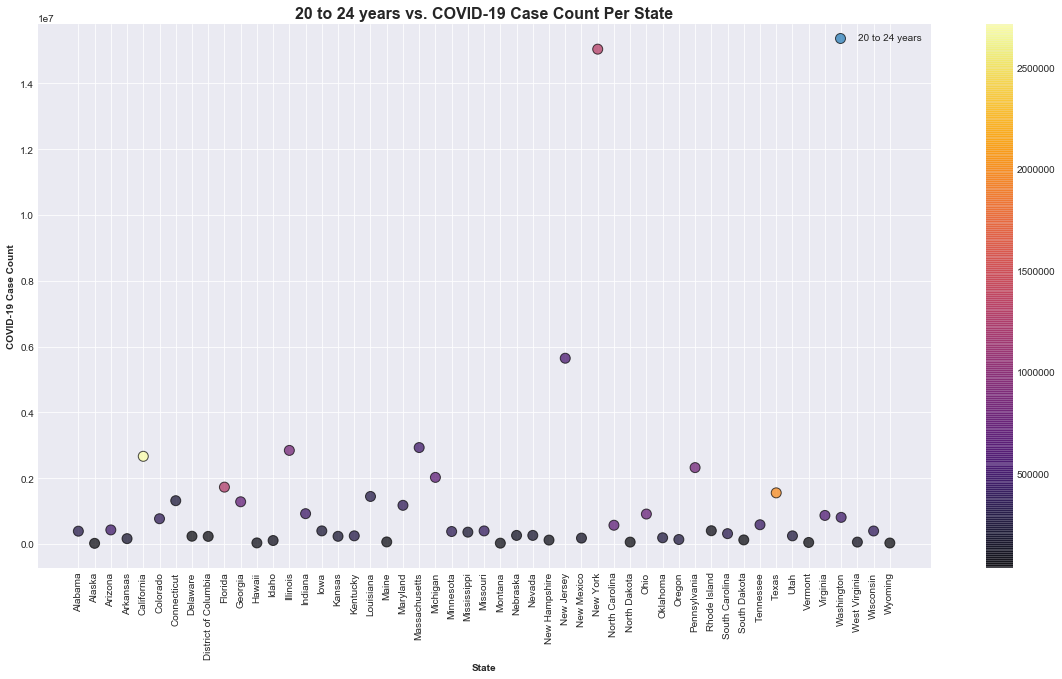

In [54]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['20 to 24 years'], cmap = 'inferno')
plt.title('20 to 24 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['20 to 24 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

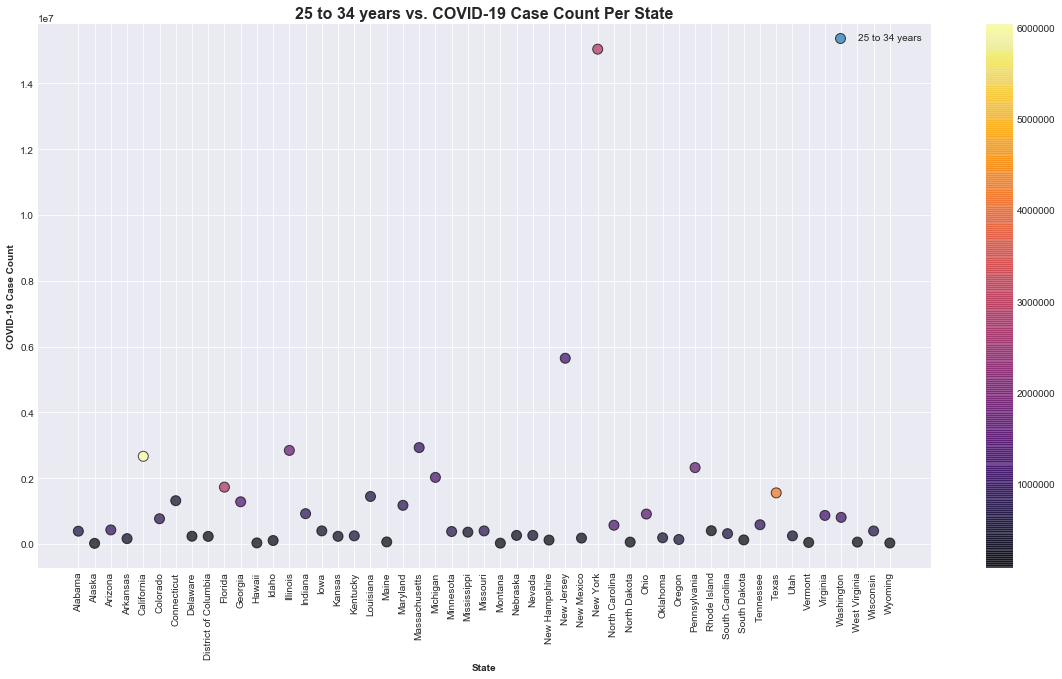

In [55]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['25 to 34 years'], cmap = 'inferno')
plt.title('25 to 34 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['25 to 34 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

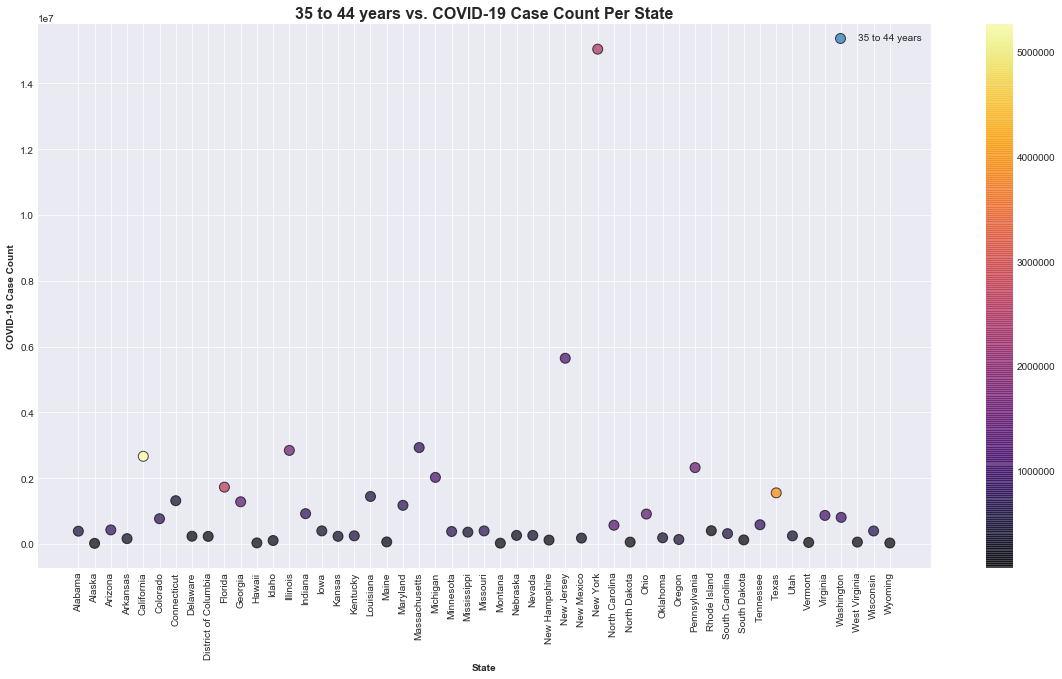

In [56]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['35 to 44 years'], cmap = 'inferno')
plt.title('35 to 44 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['35 to 44 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

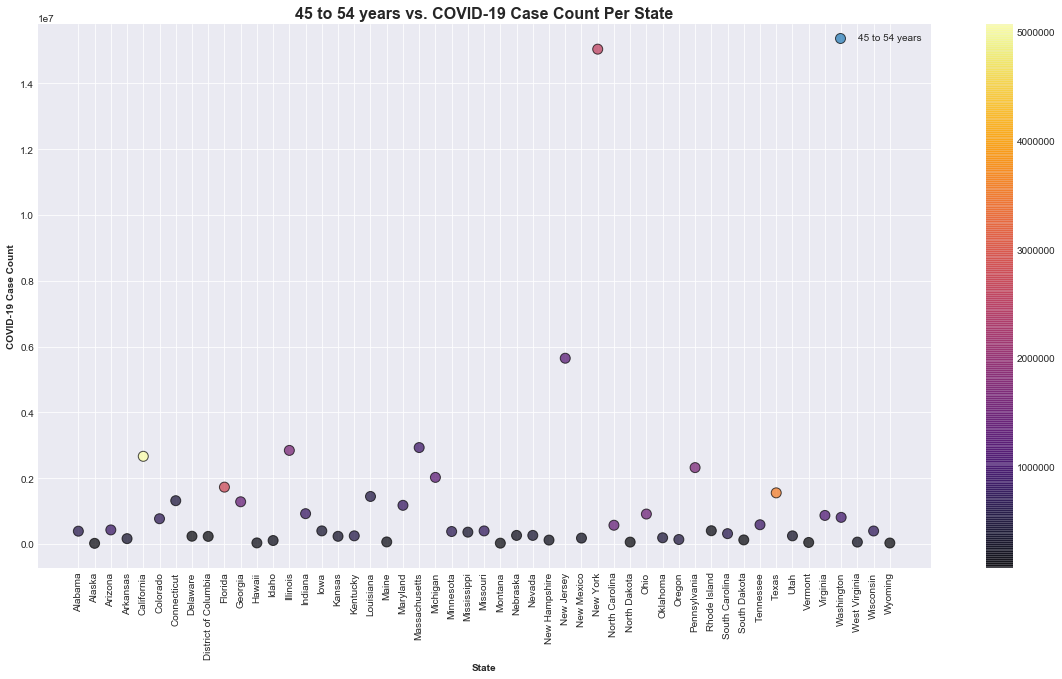

In [57]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['45 to 54 years'], cmap = 'inferno')
plt.title('45 to 54 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['45 to 54 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

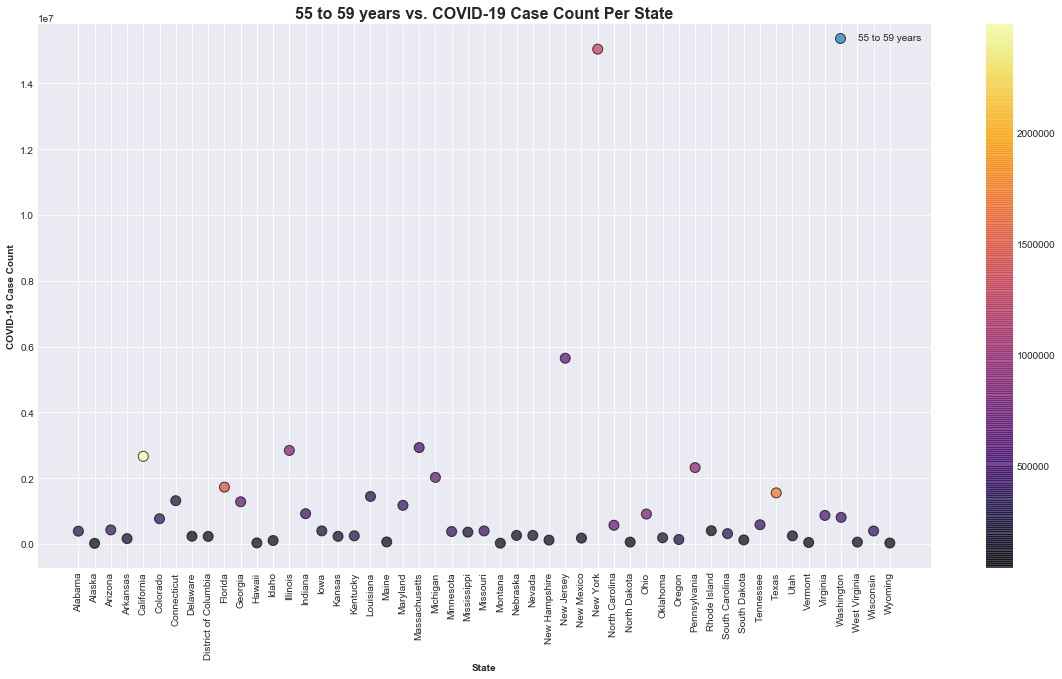

In [58]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['55 to 59 years'], cmap = 'inferno')
plt.title('55 to 59 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['55 to 59 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

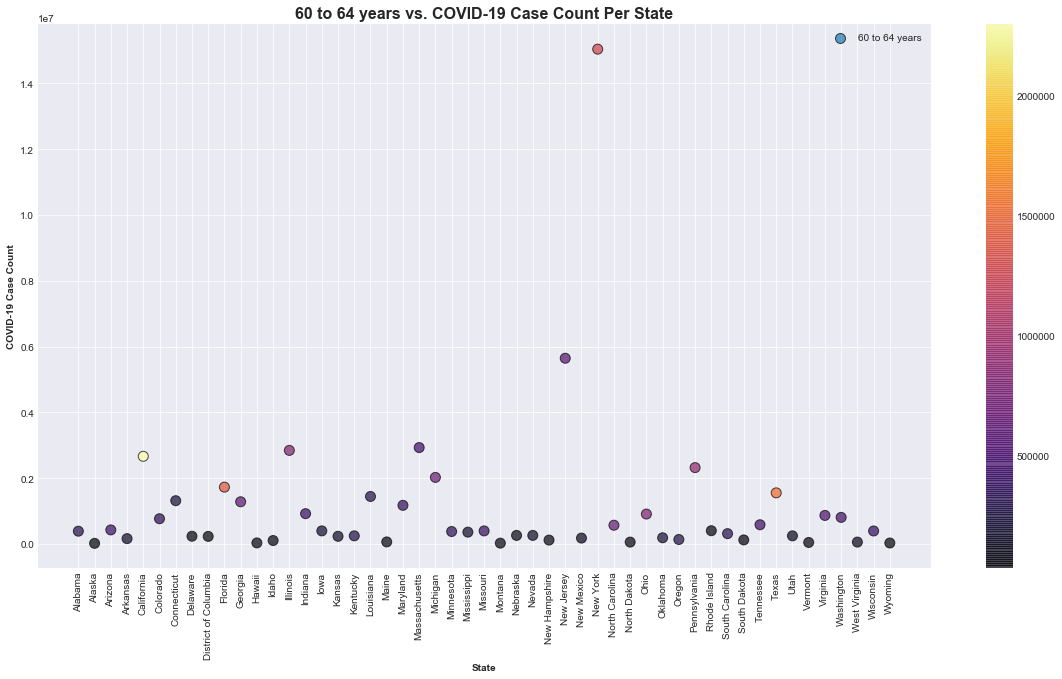

In [59]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['60 to 64 years'], cmap = 'inferno')
plt.title('60 to 64 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['60 to 64 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

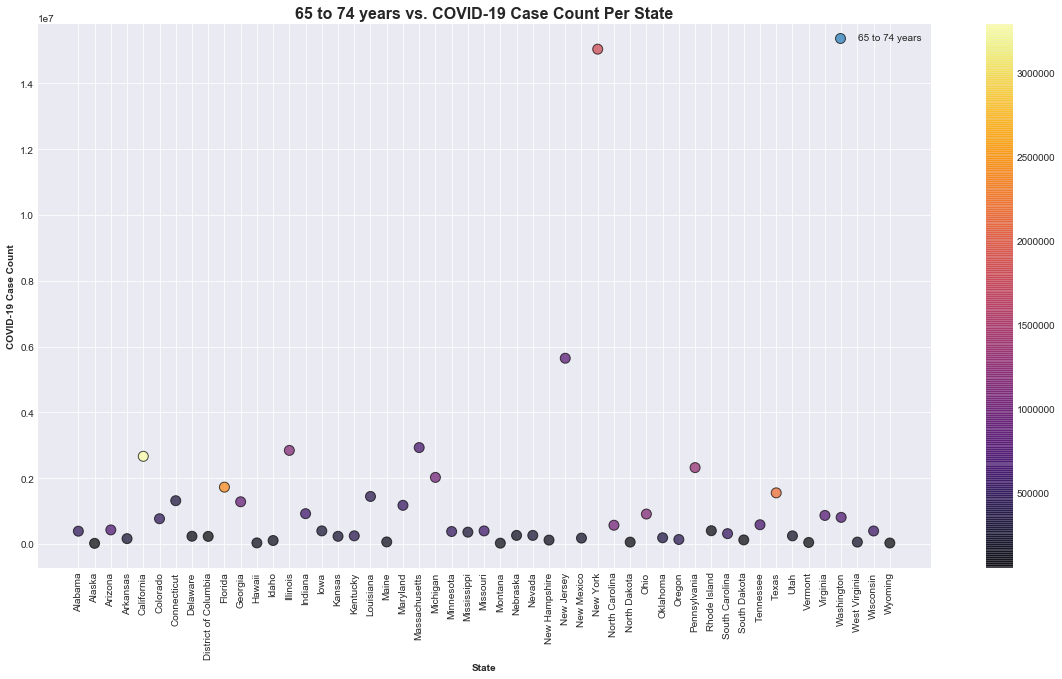

In [60]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['65 to 74 years'], cmap = 'inferno')
plt.title('65 to 74 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['65 to 74 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

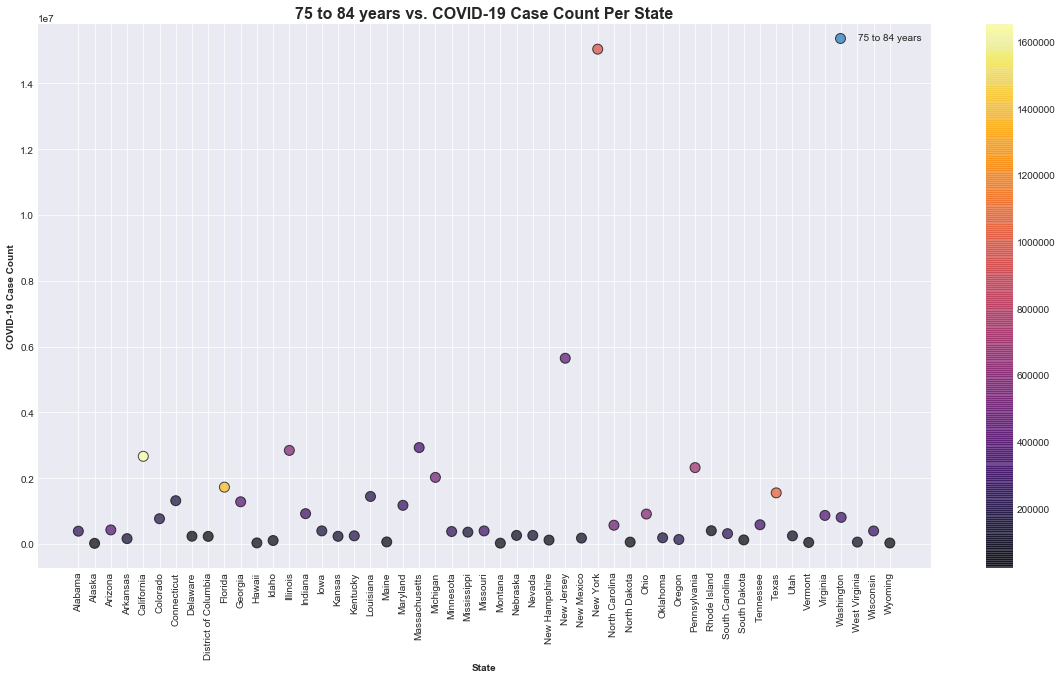

In [61]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['75 to 84 years'], cmap = 'inferno')
plt.title('75 to 84 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['75 to 84 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

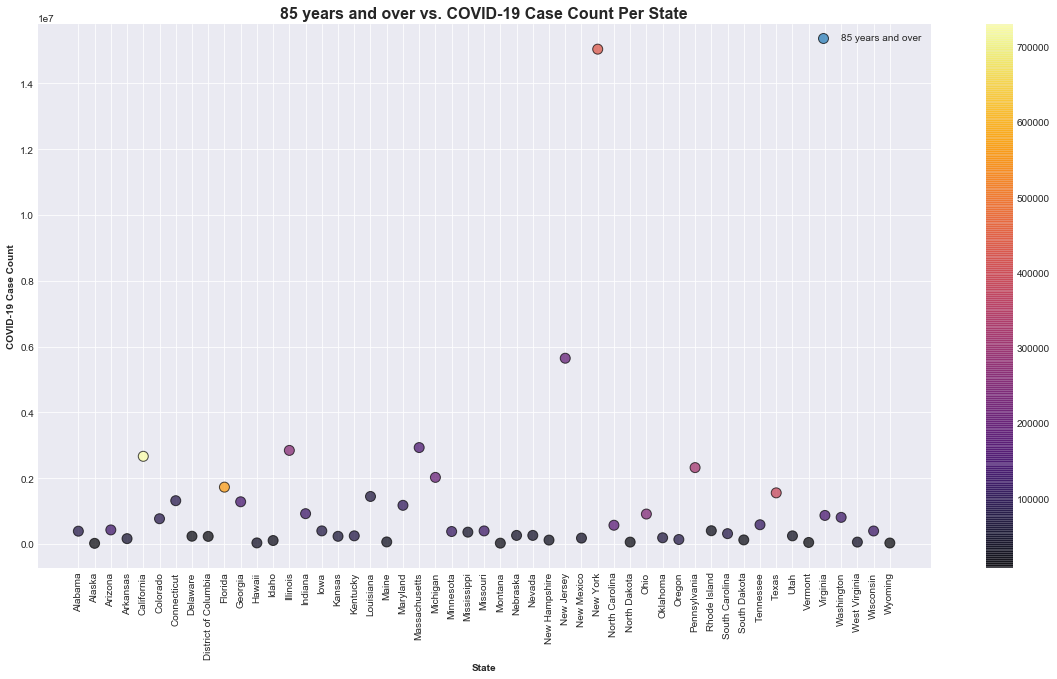

In [62]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['85 years and over'], cmap = 'inferno')
plt.title('85 years and over vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['85 years and over'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [63]:
test_len = int(0.25 * len(df))
train_len = len(df) - test_len
print('Train Set Len: ' + str(train_len))
print('Test Set Len: ' + str(test_len))

train = df[:train_len]
test = df[train_len:]
print('Train Set Shape: ' + str(train.shape))
print('Test Set Shape: ' + str(test.shape))

Train Set Len: 39
Test Set Len: 12
Train Set Shape: (39, 26)
Test Set Shape: (12, 26)


In [64]:
features_list = ['Total population_Male']

target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

SVRLinModel = SVR(kernel = 'linear')
SVRLinModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = SVRLinModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = SVRLinModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 662428.8306781282
MSE Value: 704165560465.1892
RMS Value: 839145.7325549533
R2 Score: -2.8298054161465513


C:\Users\Nithin Reddy Malyala\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


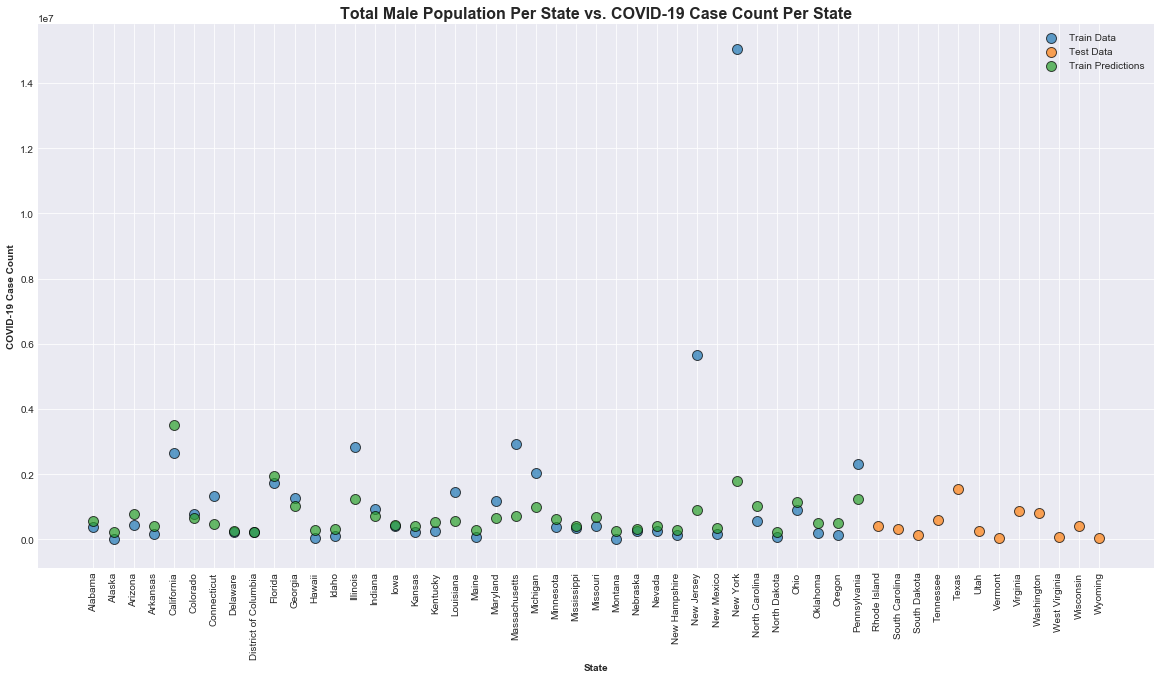

In [65]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Total Male Population Per State vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

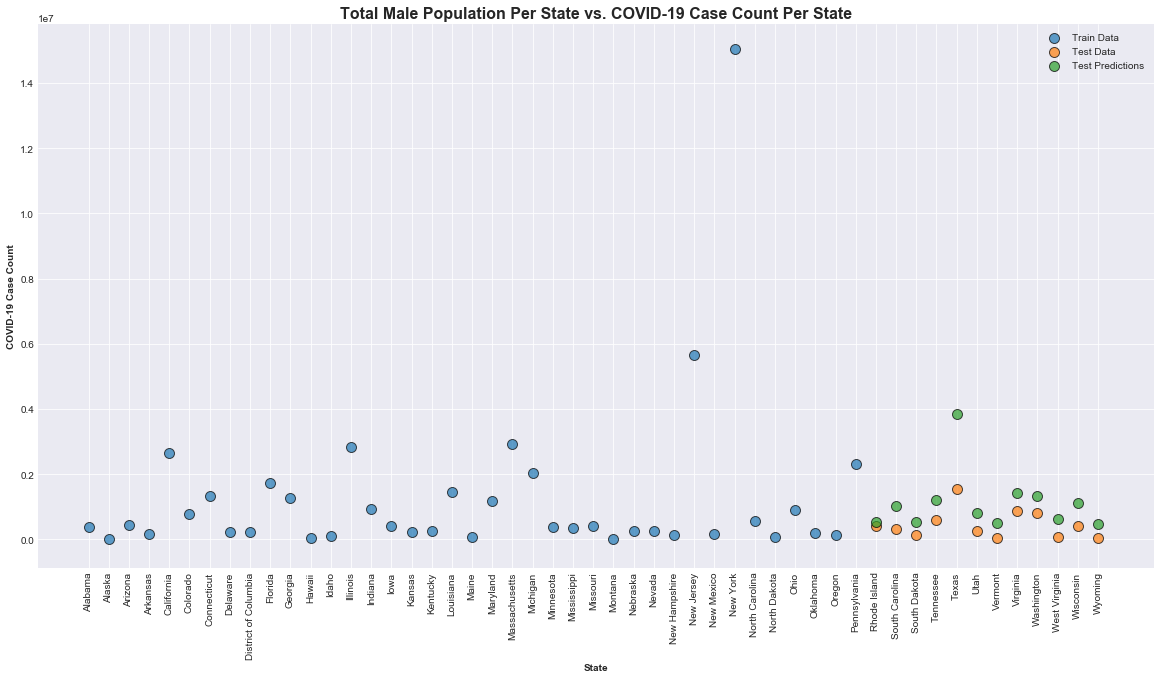

In [66]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Total Male Population Per State vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [67]:
features_list = ['Total population_Female']

target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

SVRLinModel = SVR(kernel = 'linear')
SVRLinModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = SVRLinModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = SVRLinModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 685380.3316602643
MSE Value: 755644666048.674
RMS Value: 869278.2443203522
R2 Score: -3.1097892274135566


C:\Users\Nithin Reddy Malyala\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


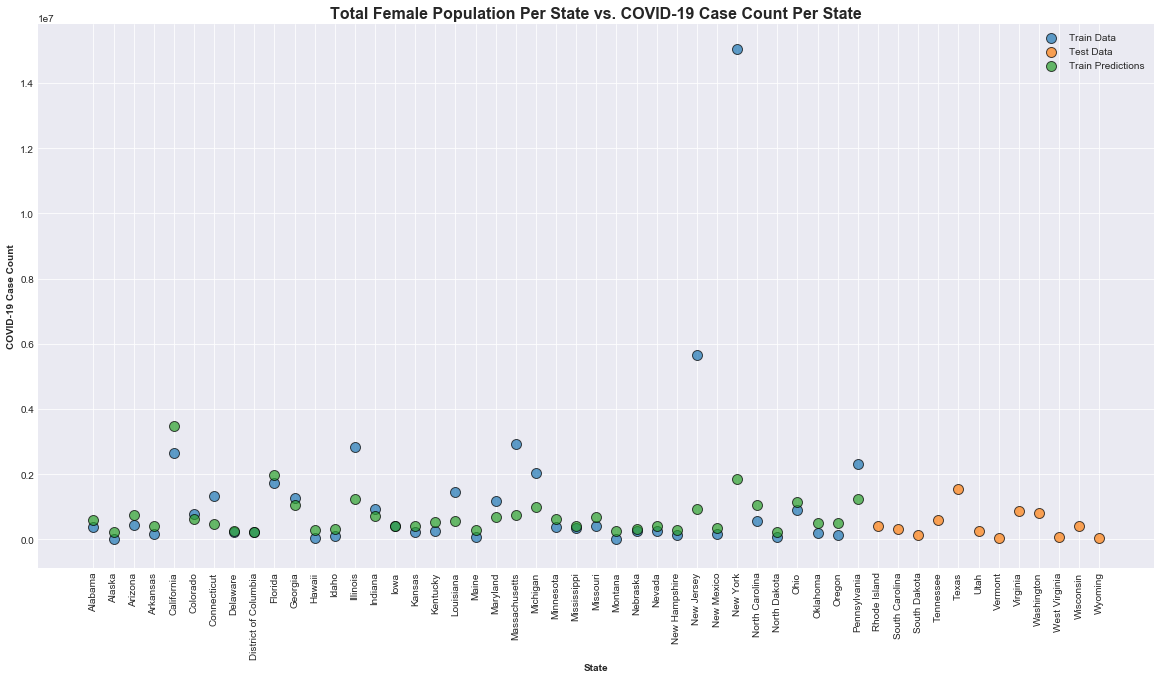

In [68]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Total Female Population Per State vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

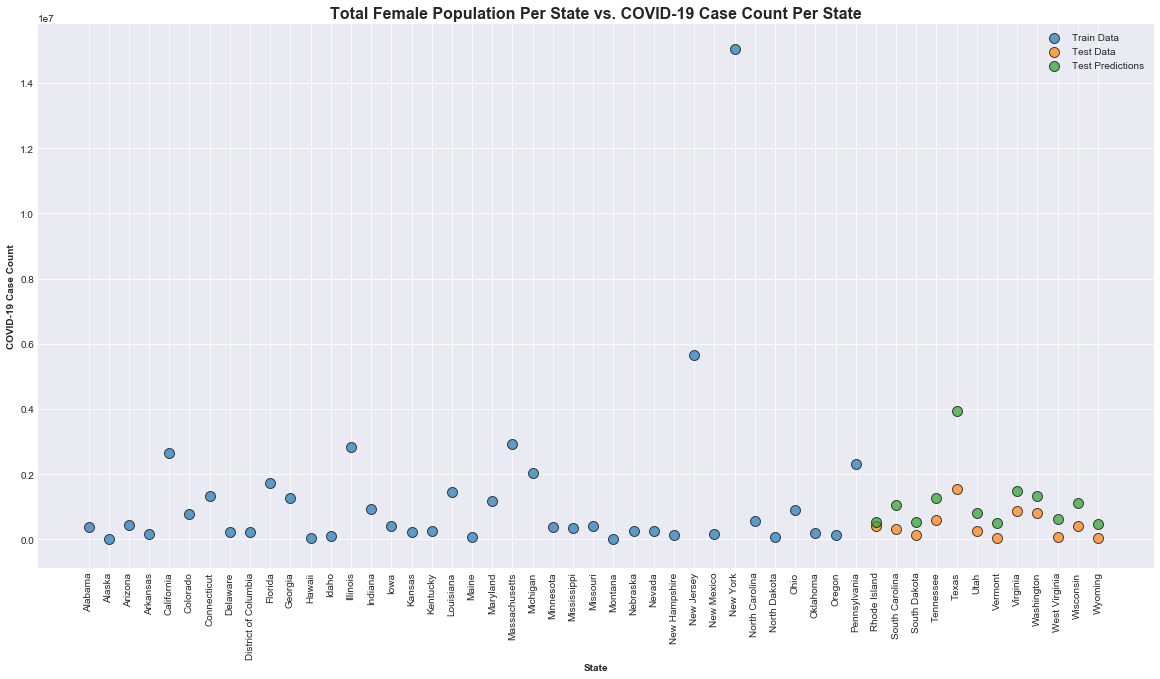

In [69]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Total Female Population Per State vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [70]:
features_list = ['Total Population']

target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

SVRLinModel = SVR(kernel = 'linear')
SVRLinModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = SVRLinModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = SVRLinModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1355322.664019581
MSE Value: 3711337472993.156
RMS Value: 1926483.1878303937
R2 Score: -19.18516830875245


C:\Users\Nithin Reddy Malyala\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


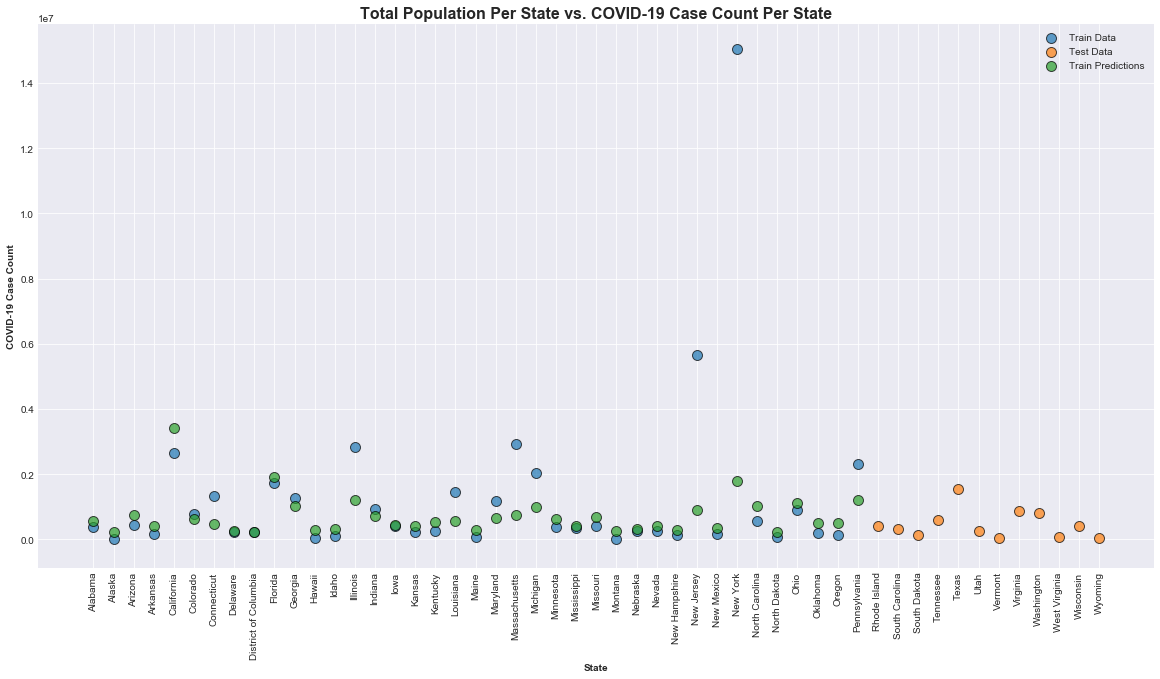

In [71]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Total Population Per State vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

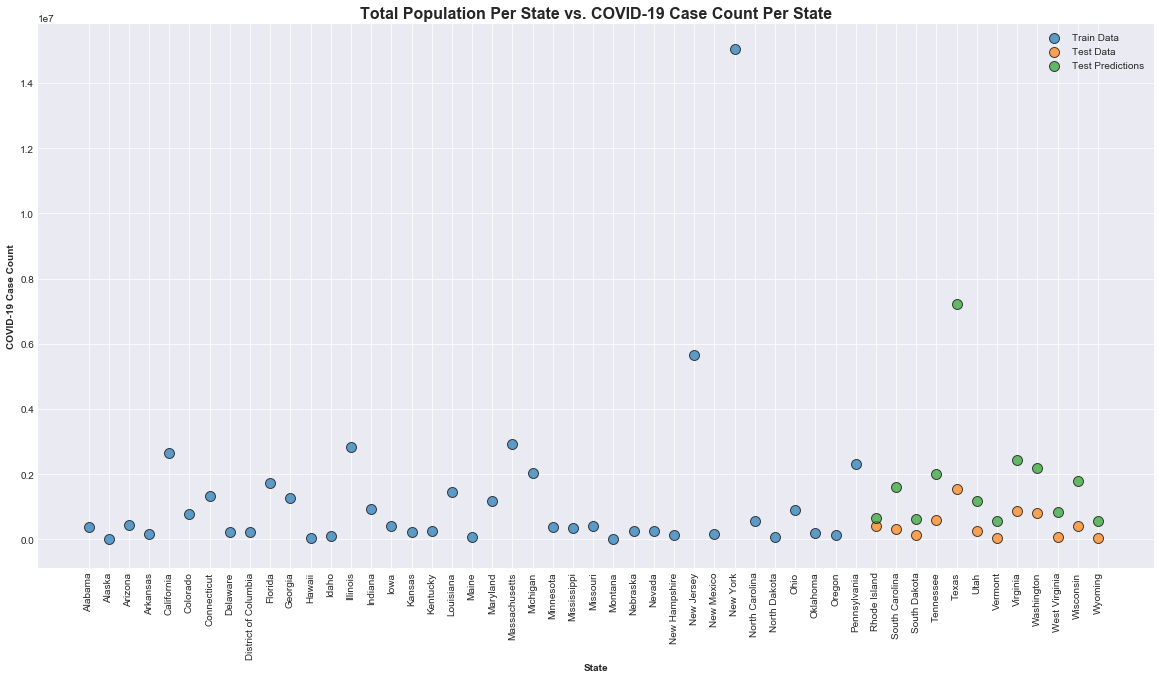

In [72]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Total Population Per State vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();